# HTML
[more study for html](https://www.w3schools.com/html/)

# Requests

In [1]:
import requests

In [2]:
res = requests.get("http://naver.com") #requsts로 url의 HTML 문서 가져옴
print("응답 코드 :", res.status_code)  # 200이면 정상

응답 코드 : 200


In [3]:
if res.status_code == requests.codes.ok:
    print("정상")
else:
    print("문제 있음 [에러 코드 :", res.status_code, "]")

정상


In [4]:
res.raise_for_status() 
#request에 문제 없는 경우 계속 진행, 문제 있으면 프로그램 종료
print("웹 스크래핑 진행")


웹 스크래핑 진행


1. 자주 쓰는 코드 : 해당 url의 html 문서 가져오는 경우

In [5]:
import requests
res = requests.get("http://google.com") 
res.raise_for_status() 

In [6]:
print(len(res.text))
print(res.text)

14089
<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="gk3j3UOan0RAP/pLcCh2Ew==">(function(){window.google={kEI:'5L5oYbiOK_eLwbkPioyV8Ak',kEXPI:'0,1302536,56873,6058,207,2415,2389,2316,383,246,5,1354,4936,315,1122515,1197719,682,328866,51223,16115,28684,17572,4859,1361,9290,3021,4754,7993,4841,4020,978,13228,3847,4192,6431,1141,17902,2778,919,2855,2226,1593,1279,2212,530,149,1103,840,1983,213,4101,4120,2025,1775,520,14670,3227,2845,7,4773,7581,5096,14396,1372,552,908,2,941,15324,432,3,346,1244,1,5444,149,11323,2652,4,1528,2304,1

In [7]:
with open("mygoogle.html","w",encoding="utf8") as f: #html 문서 생성
  f.write(res.text)

# 정규식
[w3schools 정규표현식](https://www.w3schools.com/python/python_regex.asp)<br>
[파이썬 라이브러리](https://docs.python.org/ko/3/library/re.html)

In [8]:
import re

In [9]:
# abcd, book, desk
# ca?e

p=re.compile("ca.e") 
# . : 하나의 문자 | ca.e > caae, care, cafe 등
# ^ : 문자열의 시작 | ^de > desk, destination 등
# $ : 문자열의 끝 | se$ > case, base 등

m = p.match("case")
print(m.group()) #매치 안되는 경우 에러 발샐

if m : #매칭 된 경우에 해당 단어 출력
  print(m.group())
else:
  print("매칭되지 않음")



case
case


2. 자주 쓰는 코드 : 주어진 단어가 정규식 조건 매칭하는지 출력하는 함수

In [10]:
import re
p=re.compile("ca.e") 

def print_match(e):
  if m:
    print("m.group(): ",e.group()) #일치하는 문자열 반환
    print("m.string: ",e.string) #입력 받은 문자열
    print("m.start(): :", e.start()) #일치하는 문자열의 시작 index
    print("m.end(): ",e.end()) #일치하는 문자열의 끝 index
    print("m.span(): ",e.span()) #일치하는 문자열의 시작 /  끝 index
    print()
  else:
    print("매칭되지 않음")

In [11]:
m=p.match("case")
print_match(m)

m.group():  case
m.string:  case
m.start(): : 0
m.end():  4
m.span():  (0, 4)



In [12]:
#match : 주어진 문자연의 처음부터 일치하는지 확인
k=p.match("careless") 
print_match(k)

m.group():  care
m.string:  careless
m.start(): : 0
m.end():  4
m.span():  (0, 4)



In [13]:
 #search : 주어진 문자열 중에 일치하는 게 있는지 확인
j=p.search("good care")
print_match(j) 

m.group():  care
m.string:  good care
m.start(): : 5
m.end():  9
m.span():  (5, 9)



In [14]:
#findall : 일치하는 모든 것을 리스트 형태로 반환
lst=p.findall("good care cafe")
print(lst)

['care', 'cafe']


# user agent

In [15]:
import requests
url="http://nadocoding.tistory.com"
headers={"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36"}
res=requests.get(url,headers=headers)
res.raise_for_status()

with open("nadocoing.html","w",encoding="utf8") as f:
  f.write(res.text)

# beatifulsoup4

In [16]:
import requests
from bs4 import BeautifulSoup

In [17]:
url="https://comic.naver.com/webtoon/weekday"
res=requests.get(url)
res.raise_for_status()

In [18]:
soup=BeautifulSoup(res.text,"lxml")
print(soup.title)
print(soup.title.get_text())


<title>네이버 만화 &gt; 요일별  웹툰 &gt; 전체웹툰</title>
네이버 만화 > 요일별  웹툰 > 전체웹툰


In [19]:
print(soup.a) #soup 객체에서 처음 발견된 a 태그 내용 다 가져오기

<a href="#menu" onclick="document.getElementById('menu').tabIndex=-1;document.getElementById('menu').focus();return false;"><span>메인 메뉴로 바로가기</span></a>


In [20]:
print(soup.a.attrs) # a 태그 element 모든 속성(attrs) 값 
print(soup.a["href"])# a 태그 element 여러 속성 중 href 속성 값 가져오기

{'href': '#menu', 'onclick': "document.getElementById('menu').tabIndex=-1;document.getElementById('menu').focus();return false;"}
#menu


In [21]:
print(soup.find("a",attrs={"class":"Nbtn_upload"}))
#class="Nbtn_upload"인 a 태그 element를 찾아줘
print(soup.find(attrs={"class":"Nbtn_upload"}))
#class="Nbtn_upload"인 어떤 element를 찾아줘

<a class="Nbtn_upload" href="/mypage/myActivity" onclick="nclk_v2(event,'olk.upload');">웹툰 올리기</a>
<a class="Nbtn_upload" href="/mypage/myActivity" onclick="nclk_v2(event,'olk.upload');">웹툰 올리기</a>


In [22]:
rank1=soup.find('li',attrs={"class":"rank01"})
print(rank1)
print(rank1.a.get_text())

<li class="rank01">
<a href="/webtoon/detail?titleId=641253&amp;no=361" onclick="nclk_v2(event,'rnk*p.cont','641253','1')" title="외모지상주의-361화 원나잇lll [02]">외모지상주의-361화 원나잇lll [02]</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
						
					
				</span>
</li>
외모지상주의-361화 원나잇lll [02]


In [23]:
#rank 1과 형제 관계인 다른 순위권 웹툰 가져오기
#rank2=rank1.next_sibling.next_sibling # 가운데 개행문자있어서 next sibling 2번 함
#rank3=rank2.next_sibling.next_sibling
#print(rank3.a.get_text())

In [24]:
rank2=rank1.find_next_sibling("li")
print(rank2.a.get_text())

나 혼자 만렙 뉴비-12화. 미궁 라비린토스(4)


In [25]:
rank2=rank1.find_next_siblings("li")
rank2

[<li class="rank02">
 <a href="/webtoon/detail?titleId=773797&amp;no=13" onclick="nclk_v2(event,'rnk*p.cont','773797','2')" title="나 혼자 만렙 뉴비-12화. 미궁 라비린토스(4)">나 혼자 만렙 뉴비-12화. 미궁 라비린토스(4)</a>
 <span class="rankBox">
 <img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
 						
 					
 				</span>
 </li>, <li class="rank03">
 <a href="/webtoon/detail?titleId=772764&amp;no=22" onclick="nclk_v2(event,'rnk*p.cont','772764','3')" title="죽지 않으려면-22화">죽지 않으려면-22화</a>
 <span class="rankBox">
 <img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
 						
 					
 				</span>
 </li>, <li class="rank04">
 <a href="/webtoon/detail?titleId=725586&amp;no=136" onclick="nclk_v2(event,'rnk*p.cont','725586','4')" title="1초-135화 전야 (1)">1초-135화 전야 (1)</a>
 <span class="rankBox">
 <img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/co

# 네이버 웹툰 : 요일변 전체 웹툰 가져오기

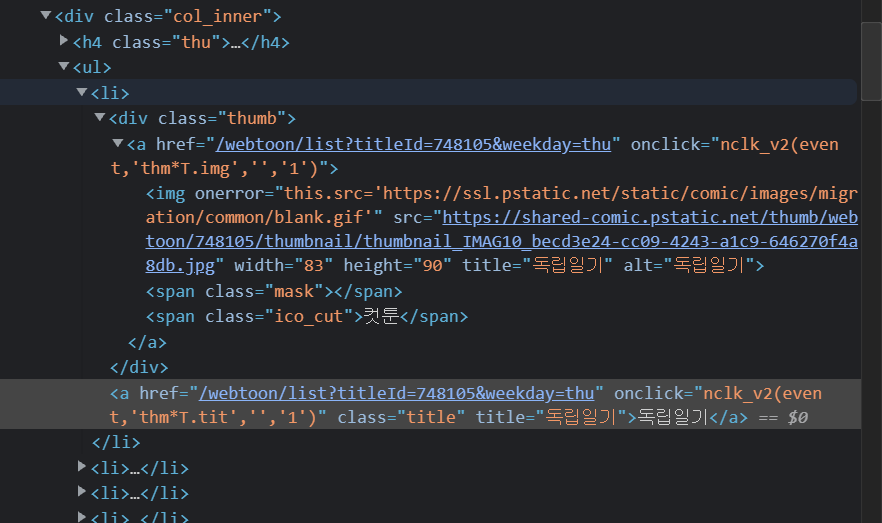

In [26]:
import requests
from bs4 import BeautifulSoup

url="https://comic.naver.com/webtoon/weekday"
res=requests.get(url)
res.raise_for_status()
soup=BeautifulSoup(res.text,"lxml")

In [27]:
# 네이버 웹툰 전체 목록 가져오기
cartoons=soup.find_all('a',attrs={"class":"title"})
#class 속성이 title인 모든 a 태그 element를 반환
for cartoon in cartoons:
  print(cartoon.get_text())

참교육
신의 탑
뷰티풀 군바리
소녀의 세계
백수세끼
팔이피플
장씨세가 호위무사
파이게임
앵무살수
만렙돌파
삼매경
잔불의 기사
요리GO
말박왕
더블클릭
유일무이 로맨스
홍천기
히어로메이커
똑 닮은 딸
오늘의 순정망화
결혼생활 그림일기
물어보는 사이
바퀴
평범한 8반
오빠집이 비어서
아는 여자애
꼬리잡기
꿈의 기업
이제야 연애
장난감
아, 쫌 참으세요 영주님!
황제와의 하룻밤
수영만화일기
순정말고 순종
하루의 하루
영앤리치가 아니야!
와이키키 뱀파이어
최후의 금빛아이
야생천사 보호구역
사랑의 헌옷수거함
착한건 돈이된다
모스크바의 여명
선배, 그 립스틱 바르지 마요
왕따협상
또다시, 계약 부부
원하는 건 너 하나
이중첩자
라서드
백호랑
마지막 지수
드로잉 레시피
살아간다
바로 보지 않는
이탄국의 자청비
트리거
그림자 신부
개밥 먹는 남자
사막에 핀 달
모락모락 왕세자님
보살님이 캐리해!
중독연구소
오로지 오로라
기사님을 지켜줘
헬로맨스
2021 최애캐 안녕, 잘 지내니?
여신강림
한림체육관
용사가 돌아왔다
엽총소년
사신소년
하루만 네가 되고 싶어
중증외상센터 : 골든 아워
덴큐
랜덤채팅의 그녀!
신도림
니나의 마법서랍
달콤살벌한 부부
1을 줄게
집이 없어
호랑이 들어와요
오피스 누나 이야기
원주민 공포만화
천마는 평범하게 살 수 없다
윌유메리미
몬스터
위아더좀비
하우스키퍼
오늘의 순정망화
아이레
견우와 선녀
빌런투킬
플레이, 플리
올가미
정년이
은주의 방 2~3부
3cm 헌터
아이즈
빅맨
용왕님의 셰프가 되었습니다
제로게임
성인초딩
나타나주세요!
이상형은 아닙니다
연우의 순정
그녀석 정복기
악인
열녀박씨 계약결혼뎐
나의 플랏메이트
숲속의 담
오파츠
기밀입니다
나는 어디에나 있다
조선홍보대행사 조대박
기계증식증
안식의 밤
교환학생
자판귀
태시트
대신 심부름을 해다오
급식러너
연애는 전쟁!
다꾸남
풋내기들
고등매직
NG불가
지원이들
프린스 메이커
피로만땅
하나in세인
인문학적 감수성
찐:종합게임동아리
2021 최애캐 안녕, 잘 지내니?
전지적 독자 시점
헬퍼 2 : 킬

# 웹툰 가우스 전자 회차별 제목 가져오기

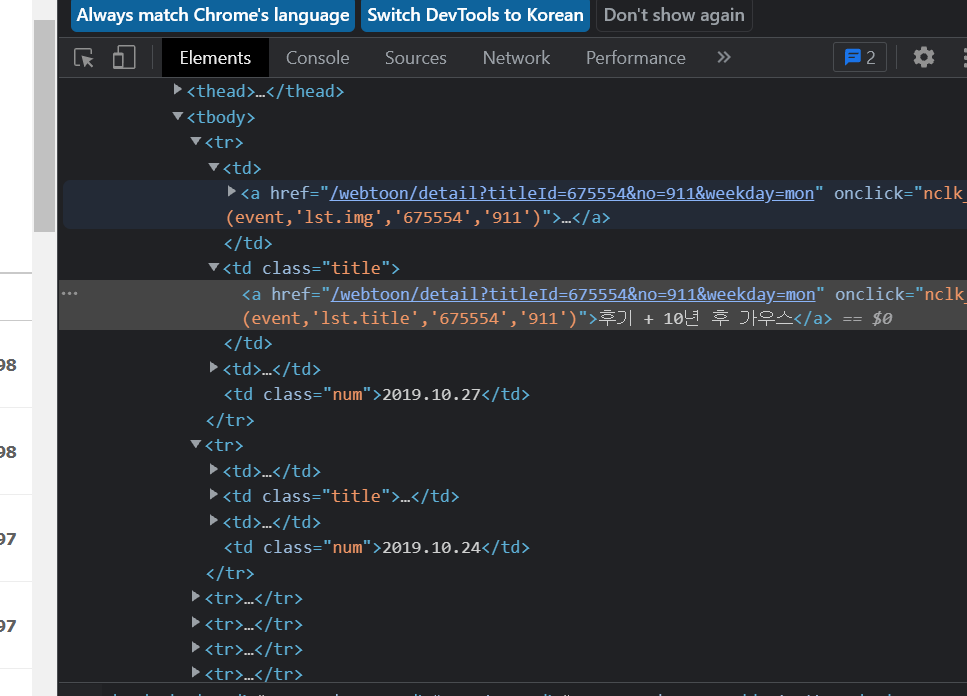

In [28]:
import requests
from bs4 import BeautifulSoup

url="https://comic.naver.com/webtoon/list?titleId=675554"
res=requests.get(url)
res.raise_for_status()
soup=BeautifulSoup(res.text,"lxml")

In [29]:
cartoons=soup.find_all("td",attrs={"class":"title"})
for cartoon in cartoons:
  print(cartoon.a.get_text())
  print("https://comic.naver.com/webtoon"+cartoon.a["href"])

후기 + 10년 후 가우스
https://comic.naver.com/webtoon/webtoon/detail?titleId=675554&no=911&weekday=mon
시즌4 430화 내일 봐요
https://comic.naver.com/webtoon/webtoon/detail?titleId=675554&no=910&weekday=mon
시즌4 429화 잠행
https://comic.naver.com/webtoon/webtoon/detail?titleId=675554&no=909&weekday=mon
시즌4 428화 추억
https://comic.naver.com/webtoon/webtoon/detail?titleId=675554&no=908&weekday=mon
시즌4 427화 섬세한사람
https://comic.naver.com/webtoon/webtoon/detail?titleId=675554&no=907&weekday=mon
시즌4 426화 적응
https://comic.naver.com/webtoon/webtoon/detail?titleId=675554&no=906&weekday=mon
시즌4 425화 대견
https://comic.naver.com/webtoon/webtoon/detail?titleId=675554&no=905&weekday=mon
시즌4 424화 초빙강사
https://comic.naver.com/webtoon/webtoon/detail?titleId=675554&no=904&weekday=mon
시즌4 423화 추억의 물건
https://comic.naver.com/webtoon/webtoon/detail?titleId=675554&no=903&weekday=mon
시즌4 422화 아니요
https://comic.naver.com/webtoon/webtoon/detail?titleId=675554&no=902&weekday=mon


In [30]:
# 웹툰 평점 구하기
total_rates=0
ratings=soup.find_all("div",attrs={"class":"rating_type"})
for rating in ratings:
  rate_num=rating.find("strong").get_text()
  total_rates+=float(rate_num)
print("avg : ",total_rates/len(ratings))

avg :  9.972999999999999


# 다음 이미지

2019영화순위 영화 포스터 이미지 전체(아마 top 30) 크롤링해 구글 드라이브에 저장<br>
[Colab에서 구글 드라이브 연동](https://m.blog.naver.com/anne9/221798711142)



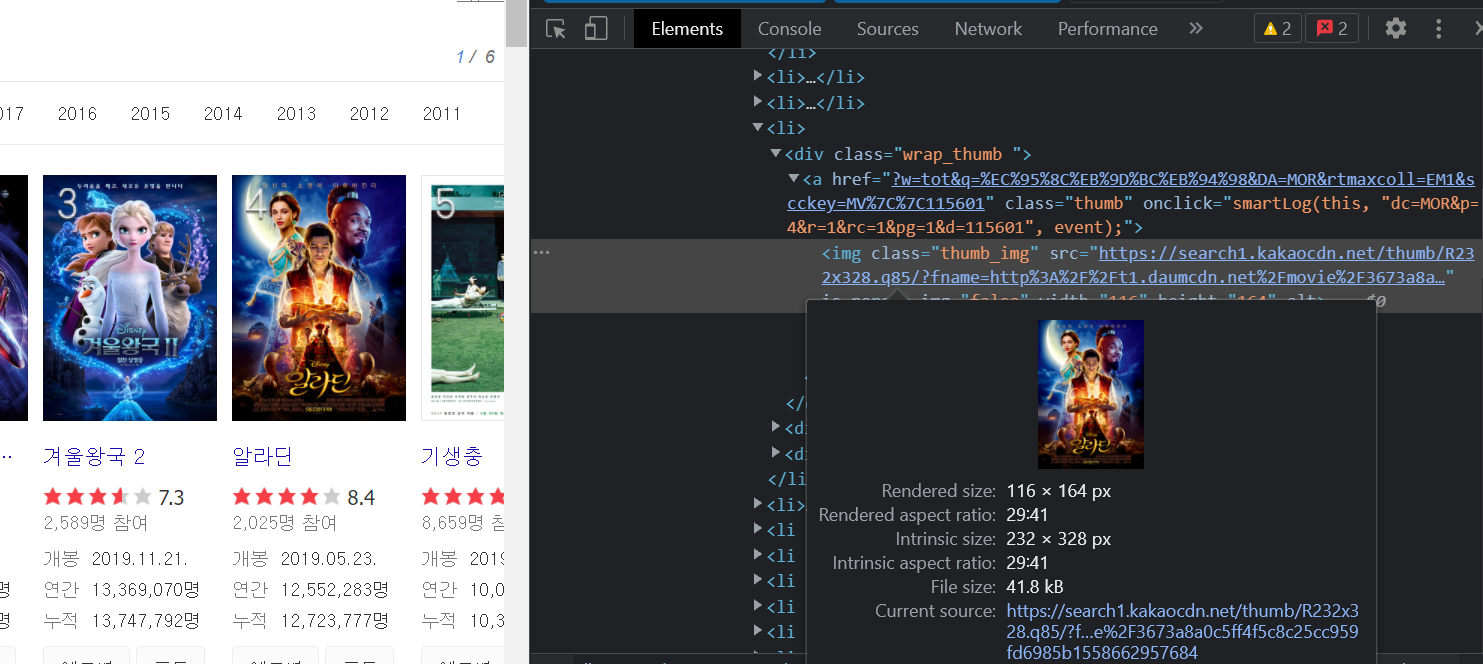

In [31]:
import requests
from bs4 import BeautifulSoup
import re

In [32]:
#크롤링한 이미지 구글 드라이브에 저장 되게 mount
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [33]:
#2019년도 영화 순위 이미지 가져오기 
#daum에서 공개한 전체 목록이 30개!

url= "https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=2019%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84"

res=requests.get(url)
res.raise_for_status()
soup=BeautifulSoup(res.text,"lxml")

movies=soup.find("ol",attrs={"class":"type_plural list_exact movie_list"}).find_all("li")
for idx,movie in enumerate(movies):
  img_link=movie.find("div",attrs={"wrap_thumb"}).find("a").find("img")["src"]
  print(img_link)

  image_res=requests.get(img_link)
  image_res.raise_for_status()

  with open("/content/gdrive/MyDrive/daum_movie_2019/movie{}_.jpg".format(idx+1),"wb") as f: #파일 저장 경로는 구글 드라이브로 설정
    f.write(image_res.content)

https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4e00e81f2b6f4d2eb65b3387240cc3c01547608409838
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F5574fb2c20c844629aa9ad1d6043ee851555464908641
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F5afd212b68e34e61a964d969dd898e2f1574298873981
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F3673a8a0c5ff4f5c8c25cc959fd6985b1558662957684
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fcab3b02a7b274bd6838b80a5e481fedf1559021787090
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F840094b1d3714d98a3f1841cac3b82d81563931141135
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F984467734d0441d9bd342456607cefe31558926997358
https://search1.kakaocdn.ne

In [34]:
#2015년~2019년도 영화 순위 이미지 가져오기 
#daum에서 공개한 년도별 목록이 30개!
for year in range(2015,2021):
  url= "https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q={}%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84".format(year)

  res=requests.get(url)
  res.raise_for_status()
  soup=BeautifulSoup(res.text,"lxml")

  movies=soup.find("ol",attrs={"class":"type_plural list_exact movie_list"}).find_all("li")
  for idx,movie in enumerate(movies):
    img_link=movie.find("div",attrs={"wrap_thumb"}).find("a").find("img")["src"]
    print(img_link)

    image_res=requests.get(img_link)
    image_res.raise_for_status()

    with open("/content/gdrive/MyDrive/daum_movie_All/movie_{}_{}.jpg".format(year,idx+1),"wb") as f: #파일 저장 경로는 구글 드라이브로 설정
      f.write(image_res.content)


https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F097f7decd11d4a0ae39cb48eade62af63e43724d
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F77746e188b1ca46a1de84b09bf78e67c5c22ce64
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F790095765b452495aef3caf3172a4960ba07e095
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fcfile%2F2502AF49546B09E61F
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Fbbb263931222d148943c3c2bf3606709d2ee2017
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Ff8356ef973b026e937354c6b67fc840afe967ad1
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fcfile%2F2478DE4B54DABBF023
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F5a29a1414bff1

# CSV 네이버 금융

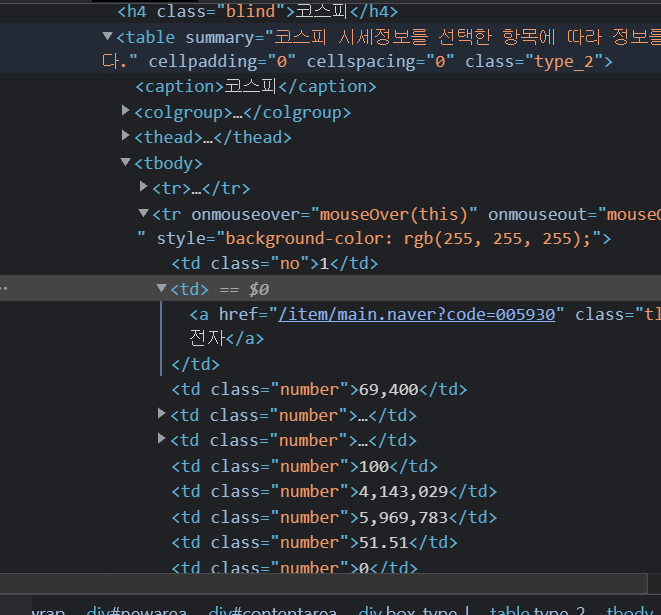

In [57]:
import csv
import requests
from bs4 import BeautifulSoup

url="https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page="

filename="시가총액 2020 1위-200위.csv"
#f=open(filename,"w",encoding="utf8",newline="") #엑셀로 열면 한글 깨짐
f=open(filename,"w",encoding="utf-8-sig",newline="")
writer=csv.writer(f)

columns_name=["N","종목명",	"현재가",	"전일비",	"등락률",	"액면가",	"시가총액",	"상장주식수",	"외국인비율",	"거래량",	"PER",	"ROE","."]
print(columns_name)
writer.writerow(columns_name) #csv 파일 가장 위에 칼럼명 적어주기

for page in range(1,3):
  res=requests.get(url+str(page))
  res.raise_for_status()
  soup=BeautifulSoup(res.text,"lxml")

  data_rows=soup.find("table",attrs={"class" : "type_2"}).find("tbody").find_all("tr")
  for row in data_rows: #모든 td 값 한번씩 돌며 출력
    columns=row.find_all("td")
    if len(columns)<=1: #의미없는 데이터 (표에서 빈칸/단순 줄바꿈용 row) skip
      continue
    data=[column.get_text().strip() for column in columns]
    #print(data)
    writer.writerow(data)



['N', '종목명', '현재가', '전일비', '등락률', '액면가', '시가총액', '상장주식수', '외국인비율', '거래량', 'PER', 'ROE', '.']


# Selenium 기초


1. Selenium 및 웹 드라이버 설치

In [1]:
#Selenium 설치
!pip install Selenium

In [2]:
#chrome web driver 설치
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [3]:
import sys
sys.path.insert(0,"usr/lib/chromium-browser/chromedriver")


2. 웹 드라이버 설정

In [12]:

from selenium import webdriver

chrome_options=webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
#chrome_options.add_argument("--disable-dev-shm-usage")

3. 웹드라이버 객체 생성

In [28]:
wd=webdriver.Chrome("chromedriver",options=chrome_options)


4. Selenium 실행


In [43]:
#upload url
wd.get("http://naver.com/")

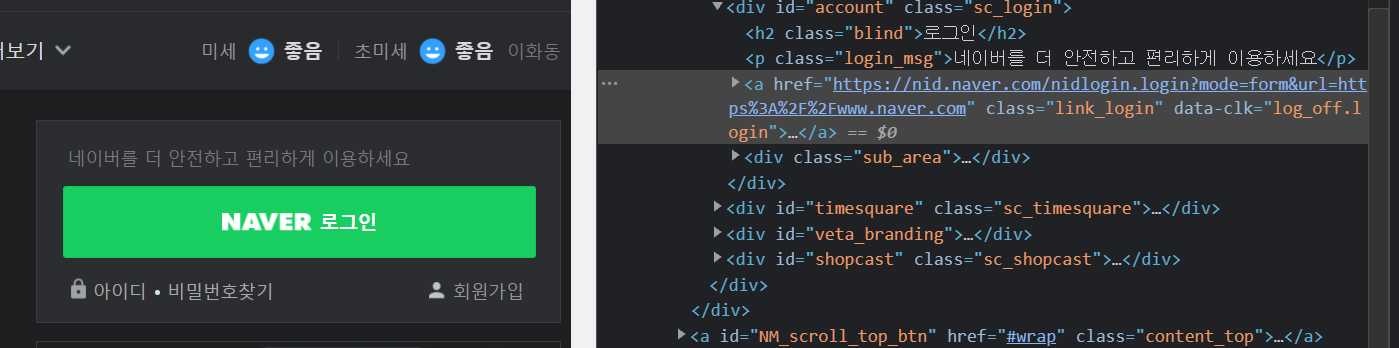

In [71]:
#click login button
elem=wd.find_element_by_class_name("link_login")
elem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


<selenium.webdriver.remote.webelement.WebElement (session="451a26fab9fd1a48418c2e6fc7b10ece", element="df569ec1-bea9-46f2-84c7-cfba1c068d90")>

In [74]:
#웹 브라우져 뒤로 가기
wd.back()

In [75]:
#웹 브라우져 앞으로 가기
wd.forward()

In [76]:
#웹 브라우져 새로고침
wd.refresh()

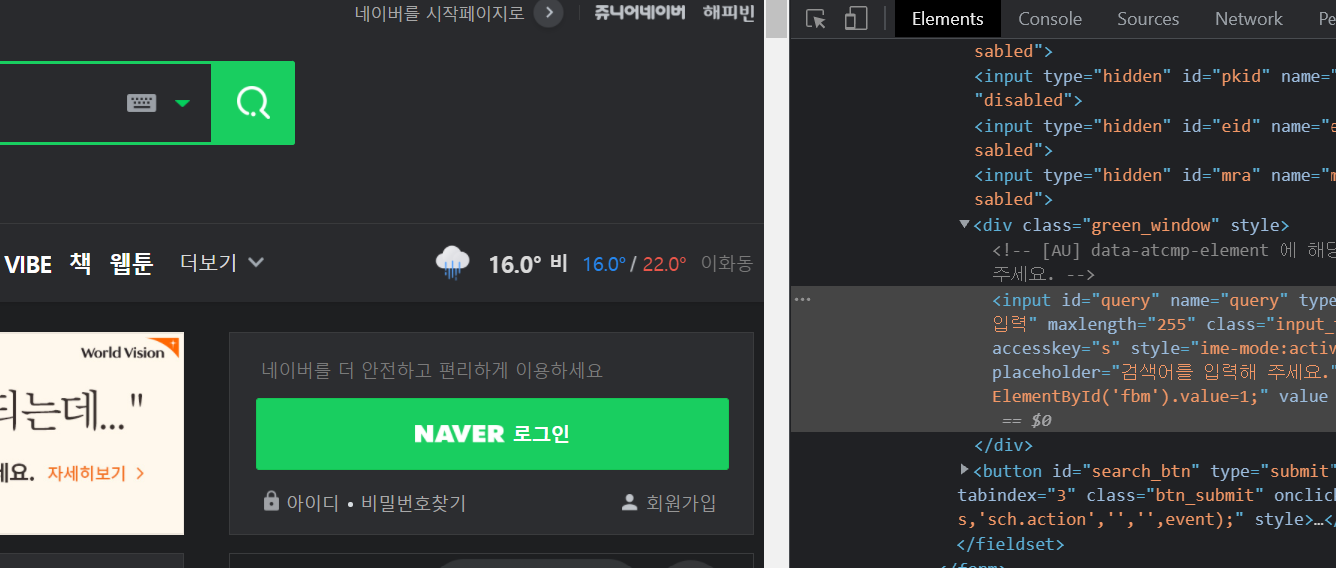

#네이버 검색창에 입력하고 검색하기

In [44]:
#검색창 가져오기
import time
elem=wd.find_element_by_id("query")
time.sleep (1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
from selenium.webdriver.common.keys import Keys #엔터 치기 위해 해당 모듈 가져옴

elem.send_keys("나도코딩") #검색어 입력
elem.send_keys(Keys.ENTER) #엔터치기

elem=wd.find_elements_by_tag_name("a")
for e in elem:
  print(e.get_attribute("href"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  


https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#lnb
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#content
https://www.naver.com/
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#
https://help.naver.com/support/alias/search/word/word_29.naver
https://help.naver.com/support/alias/search/word/w

다음에서 검색어 입력하고 xpath 이용해서 엔터 클릭

In [46]:
wd.get("https://www.daum.net/")

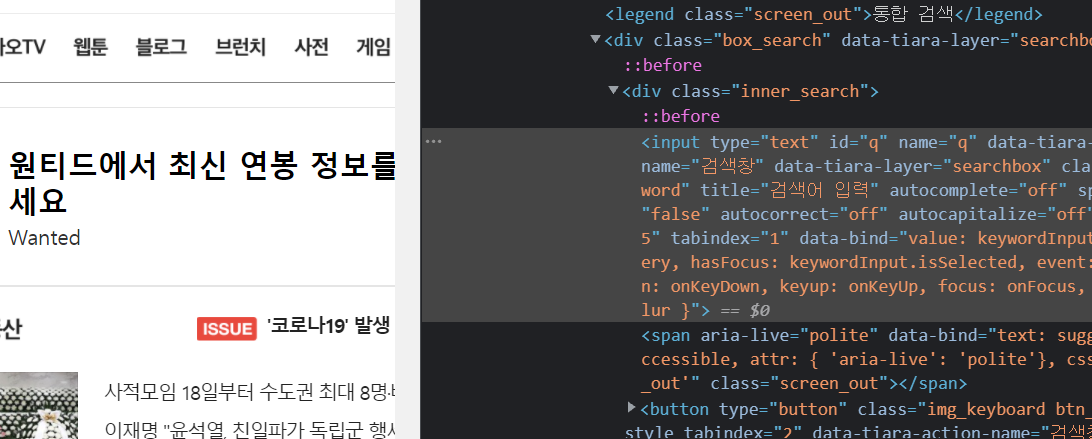

In [48]:
elem_1=wd.find_element_by_name("q") #검색창 찾음

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


In [49]:
elem_1.send_keys("나도코딩")
elem_1=wd.find_element_by_xpath("//*[@id='daumSearch']/fieldset/div/div/button[2]")
elem_1.click()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  


In [53]:
elem_1=wd.find_elements_by_tag_name("a")

for e in elem_1:
  print(e.get_attribute("href"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """Entry point for launching an IPython kernel.


https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#daumBody
https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#daumGnb
https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EB%82%98%EB%8F%84%EC%BD%94%EB%94%A9#realtimeIssueTitle
https://www.daum.net/?nil_profile=daum&nil_src=search
http://cs.daum.net/faq/15/14957.html#28978
https://logins.daum.net/accounts/loginform.do?url=https%3A%2F%2Fsearch.daum.net%2Fsearch%3Fw%3Dtot%26DA%3DYZR%26t__nil_searchbox%3Dbtn%26sug%3D%26sugo%3D%26sq%3D%26o%3D%26q%3D%25EB%2582%2598%25EB%258F%2584%25EC%25BD%2594%25EB%2594%25A9
https://mail.daum.net/?nil_profile=mini&nil_src=mail
https://accounts.daum.net/mail/create
http://www.daum.net/doc/sitemap/?nil_profile=mini&nil_src=sitemap
https://cafe.daum.net/?nil_profile=mini&nil_src=cafe
https://news.daum.net/?nil_profile=mini&nil_src=news
ht

In [54]:
wd.close() #현재탭 닫기

In [55]:
wd.quit() #브라우져 전체 닫기